In [1]:
#this will be the more manual way vs skikit - both methods will be shown 

In [2]:
import tensorflow as tf

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [4]:
from tensorflow.examples.tutorials.mnist import input_data

In [5]:
mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [6]:
type(mnist)

tensorflow.contrib.learn.python.learn.datasets.base.Datasets

In [9]:
mnist.train.images.shape

(55000, 784)

In [10]:
mnist.train.num_examples

55000

In [12]:
mnist.test.num_examples

10000

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

In [15]:
mnist.train.images[1].shape

(784,)

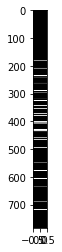

In [23]:
plt.imshow(mnist.train.images[8].reshape(784, 1), cmap = 'gist_gray',aspect = 0.02)

In [20]:
mnist.train.images[8].reshape(28, 28)

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [24]:
28*28

784

In [32]:
mnist.train.labels[1]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.])

In [25]:
x = tf.placeholder(tf.float32, shape=[None, 784])

In [26]:
W = tf.Variable(tf.zeros([784, 10]))

In [28]:
b = tf.Variable(tf.zeros([10]))

In [29]:
y = tf.matmul(x, W) + b

In [30]:
y_true = tf.placeholder(tf.float32, shape =[None, 10])

In [33]:
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels = y_true, logits = y))

In [34]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate= 0.5)

In [35]:
train = optimizer.minimize(cross_entropy)

In [36]:
init = tf.global_variables_initializer()

In [40]:
with tf.Session() as sess:
    sess.run(init)
    
    for step in range(1000):
        batch_x, batch_y = mnist.train.next_batch(100)
        sess.run(train, feed_dict = {x: batch_x, y_true: batch_y})
    
    matches = tf.equal(tf.argmax(y, 1), tf.argmax(y_true, 1))
    acc = tf.reduce_mean(tf.cast(matches, tf.float32))
    print(sess.run(acc, feed_dict = {x: mnist.test.images, y_true:mnist.test.labels}))

0.9173
